In [1]:
import numpy as np
import matplotlib.pyplot as pt
import csv
import pandas as pd
import cantools 
import matplotlib.animation as animation
from matplotlib import style
from haversine import haversine, Unit
import time
import strym

Loading BokehJS ...

In [3]:
#Extra DBC copy, loaded in as string data, same result
db2 = cantools.database.Database()
with open ('RAV4.dbc', 'r') as fin:
    db2.add_dbc_string(fin.read())

In [4]:
dbhon = cantools.database.Database()
with open ('honda.dbc', 'r') as fin:
    dbhon.add_dbc_string(fin.read())

In [5]:
#vu1 = pd.read_csv('/Volumes/NO NAME/Minitest4/2020-10-13-14-24-44_2T3MWRFVXLW056972_CAN_Messages.csv')
az1 = pd.read_csv('/Volumes/NO NAME/Minitest4/2020-10-13-13-26-52_5FNYF6H05HB089022_CAN_Messages.csv')

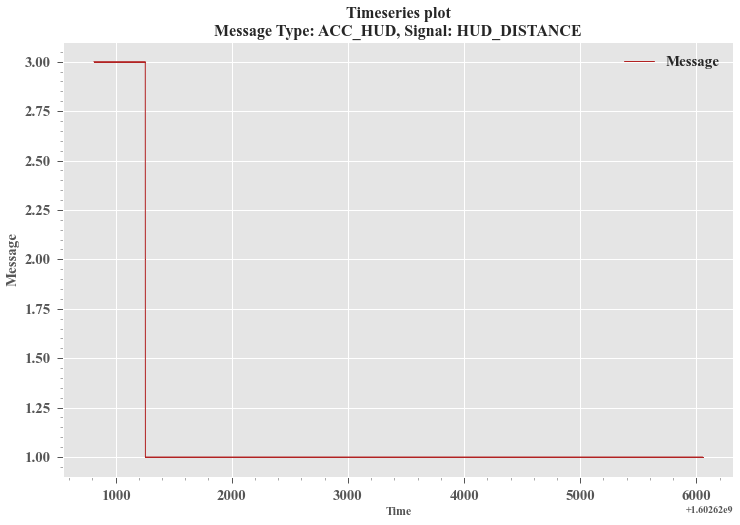

In [15]:
#az1.MessageID.sort_values().unique()
strym.plotDBC(780,11,az1,dbhon)

In [9]:
vel1 = strym.convertData(180,1,vu1,db2)
vel1 = vel1.reset_index(drop = True)
tstart = vel1.Time[0]

In [10]:
vel2 = strym.convertData(464,1,az1,dbhon)
vel2 = vel2.reset_index(drop = True)
tstart = vel2.Time[0]

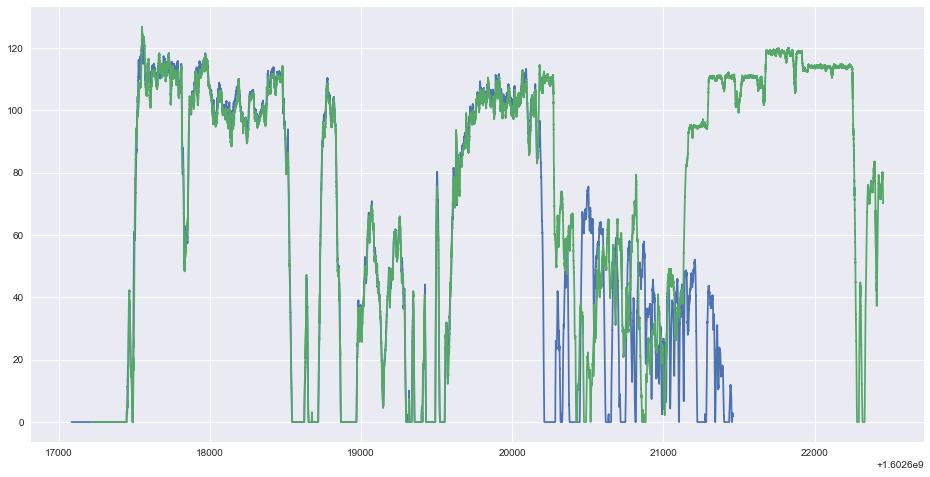

In [11]:
pt.plot(vel1.Time,vel1.Message)
pt.plot(vel2.Time-3600,vel2.Message)

In [12]:
vuVel = vel1.where(vel1.Time < 1602620200)
azVel = vel2.where(vel2.Time < 1602620200+3600)
azVel.Time = azVel.Time-3600

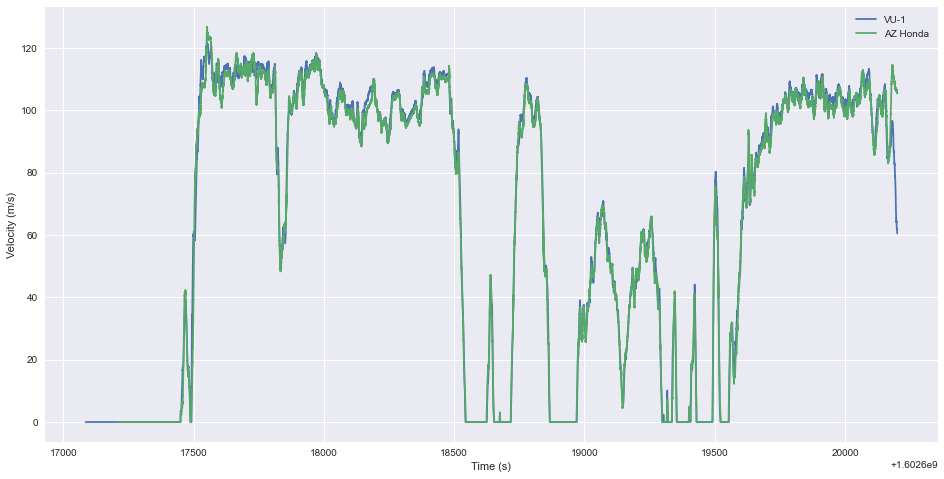

In [13]:
pt.plot(vuVel.Time,vuVel.Message)
pt.plot(azVel.Time,azVel.Message)
pt.xlabel('Time (s)')
pt.ylabel('Velocity (m/s)')
pt.legend(['VU-1', 'AZ Honda'])

In [14]:
round869 = strym.convertData(869,6,vu1,db2)
round869 = round869.loc[round869.Message < 200]

In [15]:
def radarPoints(df):
    z = pd.DataFrame(columns=['time','lon','lat','relv','theta','trackid','valid','score'])
    lon = pd.DataFrame()
    lat = pd.DataFrame()
    relv = pd.DataFrame()
    valid = pd.DataFrame()
    score = pd.DataFrame()
#     trackid = pd.DataFrame(columns=['ID'])

    a = 384
    while a < 400:
        lat = lat.append(strym.convertData(a,2,df,db2))
        a += 1
    z.lat = lat.Message
    
    a = 384
    x = 0
    while a < 400: 
        newData = strym.convertData(a,1,df,db2)
        lon = lon.append(newData)
        z.trackid[x: x+newData.shape[0]] = a
        x = x+newData.shape[0]
#         z = z.append(x)
#         print(z)
        a = a + 1

    z.lon = lon.Message

    a = 384
    while a < 400:
        relv = relv.append(strym.convertData(a,4,df,db2))
        a += 1
#     print(lon)

    a = 384
    while a < 400:
        valid = valid.append(strym.convertData(a,5,df,db2))
        a += 1
#     print(lon)

    z.valid = valid.Message
    
    a = 400
    while a < 416:
        if a == 401:
            filtered401 = df.loc[
                df.Bus == 1
            ]
            score = score.append(strym.convertData(a,2,filtered401,db2))
        else:
            score = score.append(strym.convertData(a,2,df,db2))
        a+= 1
    score = score.reset_index(drop = True)
    
    z.time = lon.Time
    z.relv = relv.Message
    z.theta = np.degrees(np.arctan(np.array(z.lat),np.array(z.lon)))
#     z.trackid = trackid.ID
#     print(trackid)
    z = z.reset_index(drop=True)
    
    
    z.score = score.Message
    c
    return z

In [16]:
rav4Radar = radarPoints(vu1)

/Users/mnice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Time (s)')

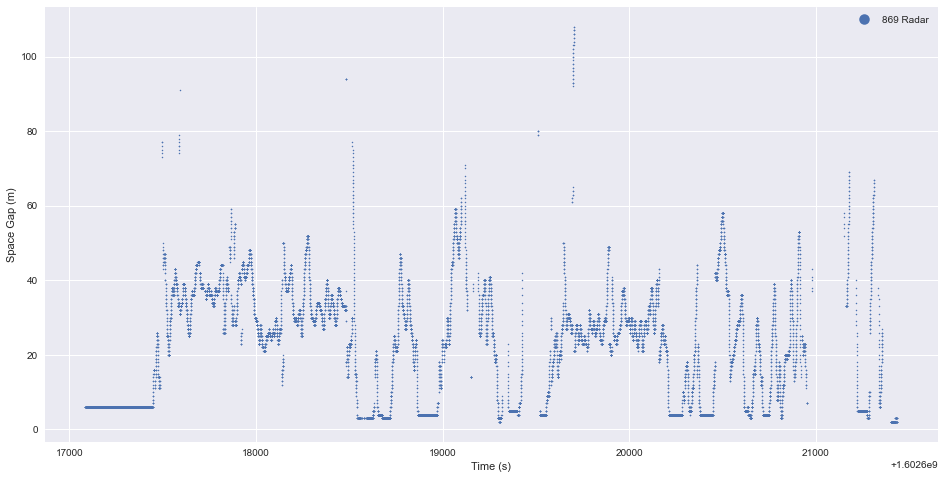

In [34]:
score100 = rav4Radar.loc[
#     ((rav4Radar.trackid == 384)
#     |(rav4Radar.trackid == 385)
#     |(rav4Radar.trackid == 386)
#      |(rav4Radar.trackid == 387)
#     )
    (abs(rav4Radar.relv) < 7)
    &(rav4Radar.score >= 95)
    &(rav4Radar.valid ==1)
    &(abs(rav4Radar.theta) < 15)
]
pt.plot(round869.Time,round869.Message,'.',markersize = 3)
#pt.plot(score100.time,score100.lon,'.',markersize = 3)
pt.legend(['869 Radar','Processed Radar'],markerscale = 7)
pt.ylabel('Space Gap (m)')
pt.xlabel('Time (s)')

In [38]:
score100

,time,lon,lat,relv,theta,trackid,valid,score
7207,1.602617e+09,6.36,-0.24,0.050,-13.495733,384,1,100
7208,1.602617e+09,6.36,-0.20,0.025,-11.309932,384,1,100
7209,1.602617e+09,6.28,-0.16,-0.025,-9.090277,384,1,100
7210,1.602617e+09,6.28,-0.16,0.050,-9.090277,384,1,100
7211,1.602617e+09,6.36,-0.16,0.050,-9.090277,384,1,100
...,...,...,...,...,...,...,...,...
1320101,1.602617e+09,13.80,-0.04,-1.050,-2.290610,399,1,100
1320102,1.602617e+09,13.76,-0.08,-1.125,-4.573921,399,1,100
1320103,1.602617e+09,13.64,-0.08,-1.200,-4.573921,399,1,100
1320104,1.602617e+09,13.56,-0.04,-1.250,-2.290610,399,1,100


/Users/mnice/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:687: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/mnice/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Text(0.5, 1.0, 'VU-1 RelVel to Leader')

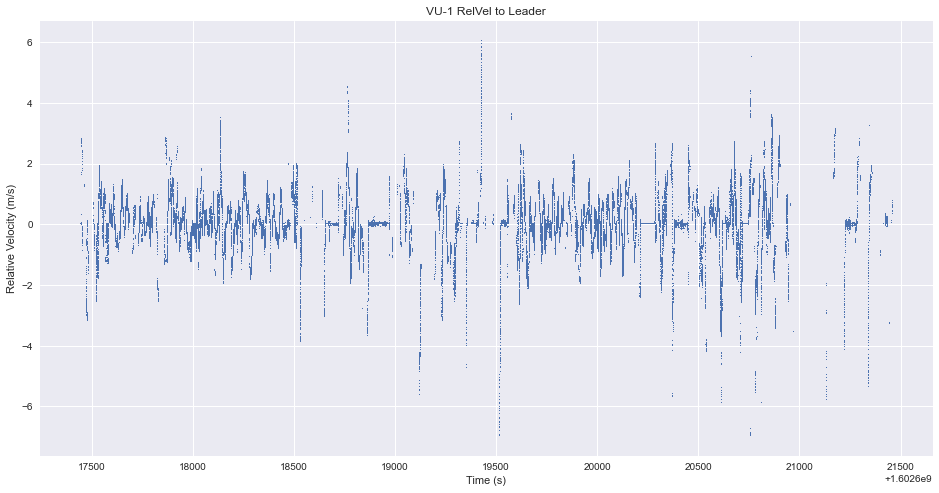

In [23]:
fVUvel = strym.interp1d(azVel.Time,azVel.Message)

xnew = vuVel.Time.where(vuVel.Time > 1602617213.644904)
vu1VelInterpolated = fVUvel(xnew)

#pt.plot(xnew,(vu1VelInterpolated-vuVel.Message)/(3.6*3.6))
pt.plot(score100.time,score100.relv,',')
pt.xlabel('Time (s)')
pt.ylabel('Relative Velocity (m/s)')
pt.title('VU-1 RelVel to Leader')

In [3]:
x = np.linspace(0, 1, 10)
number = 16
cmap = pt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i in range(384,400):
    pt.plot(rav4Radar.where(rav4Radar.trackid == i).time,rav4Radar.where(rav4Radar.trackid == i).lon,color = colors[i-384],ls = '',markersize = 2, marker = '.',label=i)
    
pt.legend(markerscale = 15)
pt.xlabel('Time (s)')
pt.ylabel('Space Gap (m)')

NameError: name 'rav4Radar' is not defined